# Tutorial on ProfileHistogram

In [1]:
from matplotlib import pyplot as plt
import poisson_approval as pa

## Profile

Generate a random profile:

In [2]:
generator_profile = pa.GeneratorProfileHistogramUniform(n_bins = 10)
profile = generator_profile()
profile

<abc: 0.022984105176626524 [0.0220541  0.11599701 0.13739101 0.08368763 0.04511581 0.26714023
 0.04169964 0.21493668 0.0231598  0.04881809], acb: 0.145055079173939 [0.02784636 0.13187789 0.06232175 0.13334589 0.00843569 0.08208042
 0.02225328 0.15155103 0.19268964 0.18759805], bac: 0.13596196134173733 [0.15864452 0.10655161 0.18583392 0.09793761 0.01754954 0.0858738
 0.28696591 0.0081929  0.0514583  0.0009919 ], bca: 0.4052290359766034 [0.06568874 0.17159545 0.111721   0.06502855 0.08078522 0.18466481
 0.20570647 0.02377138 0.04523144 0.04580693], cab: 0.24096824770160463 [0.07478603 0.21574223 0.07865941 0.26175002 0.04979234 0.18937425
 0.10021361 0.02177494 0.00722498 0.00068219], cba: 0.04980157062948909 [0.12428269 0.17744824 0.00974348 0.04645408 0.20087644 0.17006015
 0.07305136 0.06442503 0.13299316 0.00066537]> (Condorcet winner: b)

Share of each ranking:

In [3]:
profile.d_ranking_share

{abc: 0.022984105176626524, acb: 0.145055079173939, bac: 0.13596196134173733, bca: 0.4052290359766034, cab: 0.24096824770160463, cba: 0.04980157062948909}

Distribution of the utilities for voters $abc$:

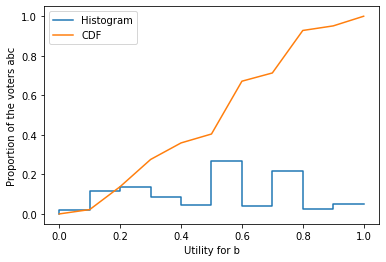

In [4]:
ranking = 'abc'
profile.plot_histogram(ranking, label='Histogram')
profile.plot_cdf(ranking, label='CDF')
plt.ylabel('Proportion of the voters %s' % ranking)
plt.legend()

## Strategic Analysis

Generate a random strategy:

In [5]:
generator_strategy = pa.GeneratorStrategyThresholdUniform()
strategy = generator_strategy()
strategy

<abc: utility-dependent (0.14037883010626384), acb: utility-dependent (0.7831222136262024), bac: utility-dependent (0.0362894038760504), bca: utility-dependent (0.914194101655246), cab: utility-dependent (0.946191892987511), cba: utility-dependent (0.7301405753951464)>

Tau vector (ballot shares) associated to the strategy in the given profile:

In [6]:
tau = profile.tau(strategy)
tau

<a: 0.08776556117171876, ab: 0.14953515136927614, ac: 0.05896139926268798, b: 0.3971289755582795, bc: 0.024825368668953865, c: 0.2817835439690838> ==> b

Is the strategy an equilibrium for the given profile?

In [7]:
profile.is_equilibrium(strategy)

EquilibriumStatus.NOT_EQUILIBRIUM

Use iterated voting to search for an equilibrium:

In [8]:
result = profile.iterated_voting(strategy_ini=strategy, n_max_episodes=1000, 
                                 ballot_update_ratio=0.1, verbose=True)
cycle_taus_actual = result['cycle_taus_actual']
cycle_strategies = result['cycle_strategies']

t = 0
strategy: <abc: utility-dependent (0.14037883010626384), acb: utility-dependent (0.7831222136262024), bac: utility-dependent (0.0362894038760504), bca: utility-dependent (0.914194101655246), cab: utility-dependent (0.946191892987511), cba: utility-dependent (0.7301405753951464)> ==> b
tau_actual: <a: 0.08776556117171876, ab: 0.14953515136927614, ac: 0.05896139926268798, b: 0.3971289755582795, bc: 0.024825368668953865, c: 0.2817835439690838> ==> b
t = 1
tau_perceived: <a: 0.08776556117171876, ab: 0.14953515136927614, ac: 0.05896139926268798, b: 0.3971289755582795, bc: 0.024825368668953865, c: 0.2817835439690838> ==> b
strategy: <abc: ab, acb: ac, bac: b, bca: b, cab: ac, cba: c> ==> b
tau_full_response: <ab: 0.022984105176626524, ac: 0.38602332687554364, b: 0.5411909973183407, c: 0.04980157062948909> ==> b
tau_actual: <a: 0.07898900505454688, ab: 0.1368800467500112, ac: 0.09166759202397354, b: 0.4115351777342856, bc: 0.02234283180205848, c: 0.25858534663512434> ==> b
t = 2
tau_per

t = 26
tau_perceived: <a: 0.00630067197538231, ab: 0.07836280119527464, ac: 0.2943250004438172, b: 0.48455519188745616, bc: 0.0017822082211150349, c: 0.13467412627695483> ==> b
strategy: <abc: ab, acb: ac, bac: utility-dependent (0.5108487033385795), bca: b, cab: utility-dependent (0.48915129666142043), cba: c> ==> b
tau_full_response: <ab: 0.0806546293542925, ac: 0.22329067117759457, b: 0.48352047314067476, c: 0.21253422632743815> ==> b
tau_actual: <a: 0.005670604777844079, ab: 0.07859198401117642, ac: 0.28722156751719496, b: 0.48445172001277803, bc: 0.0016039873990035315, c: 0.14246013628200316> ==> b
t = 27
tau_perceived: <a: 0.005670604777844079, ab: 0.07859198401117642, ac: 0.28722156751719496, b: 0.48445172001277803, bc: 0.0016039873990035315, c: 0.14246013628200316> ==> b
strategy: <abc: ab, acb: ac, bac: utility-dependent (0.4927321211084256), bca: b, cab: ac, cba: c> ==> b
tau_full_response: <ab: 0.08209469393400154, ac: 0.38602332687554364, b: 0.48208040856096573, c: 0.049801

t = 47
tau_perceived: <a: 0.000689413158395582, ab: 0.08140086795144426, ac: 0.2984325182069658, b: 0.48263668290240846, bc: 0.00019500742197627806, c: 0.1366455103588098> ==> b
strategy: <abc: ab, acb: ac, bac: utility-dependent (0.4846381366300208), bca: b, cab: ac, cba: c> ==> b
tau_full_response: <ab: 0.08228782203794294, ac: 0.38602332687554364, b: 0.48188728045702434, c: 0.04980157062948909> ==> b
tau_actual: <a: 0.0006204718425560238, ab: 0.08148956336009412, ac: 0.3071915990738236, b: 0.4825617426578701, bc: 0.00017550667977865025, c: 0.12796111638587776> ==> b
t = 48
tau_perceived: <a: 0.0006204718425560238, ab: 0.08148956336009412, ac: 0.3071915990738236, b: 0.4825617426578701, bc: 0.00017550667977865025, c: 0.12796111638587776> ==> b
strategy: <abc: ab, acb: ac, bac: utility-dependent (0.5036840307335302), bca: b, cab: utility-dependent (0.4963159692664698), cba: c> ==> b
tau_full_response: <ab: 0.08149114570486488, ac: 0.22243102705387383, b: 0.4826839567901024, c: 0.213393

t = 77
tau_perceived: <a: 2.9225022314563838e-05, ab: 0.08187132198114849, ac: 0.2998424251111603, b: 0.48229794954042954, bc: 8.266590489838287e-06, c: 0.13595081175445764> ==> b
strategy: <abc: ab, acb: ac, bac: utility-dependent (0.4839666407119246), bca: b, cab: ac, cba: c> ==> b
tau_full_response: <ab: 0.08230384439798234, ac: 0.38602332687554364, b: 0.48187125809698494, c: 0.04980157062948909> ==> b
tau_actual: <a: 2.6302520083107453e-05, ab: 0.08191457422283188, ac: 0.30846051528759866, b: 0.4822552803960851, bc: 7.439931440854458e-06, c: 0.1273358876419608> ==> b
t = 78
tau_perceived: <a: 2.6302520083107453e-05, ab: 0.08191457422283188, ac: 0.30846051528759866, b: 0.4822552803960851, bc: 7.439931440854458e-06, c: 0.1273358876419608> ==> b
strategy: <abc: ab, acb: ac, bac: utility-dependent (0.503385945117216), bca: b, cab: utility-dependent (0.4966140548827839), cba: c> ==> b
tau_full_response: <ab: 0.08152594889904594, ac: 0.22239526163058718, b: 0.4826491535959213, c: 0.21342

tau_actual: <a: 6.583929794122581e-07, ab: 0.081894280858201, ac: 0.2999017354882829, b: 0.4822806902742682, bc: 1.8623305342947146e-07, c: 0.1359224487532154> ==> b
t = 113
tau_perceived: <a: 6.583929794122581e-07, ab: 0.081894280858201, ac: 0.2999017354882829, b: 0.4822806902742682, bc: 1.8623305342947146e-07, c: 0.1359224487532154> ==> b
strategy: <abc: ab, acb: ac, bac: utility-dependent (0.4839476387501118), bca: b, cab: ac, cba: c> ==> b
tau_full_response: <ab: 0.08230429779801861, ac: 0.38602332687554364, b: 0.48187080469694865, c: 0.04980157062948909> ==> b
tau_actual: <a: 5.925536814710323e-07, ab: 0.08193528255218276, ac: 0.308513894627009, b: 0.48223970171653624, bc: 1.6760974808652433e-07, c: 0.12731036094084278> ==> b
t = 114
tau_perceived: <a: 5.925536814710323e-07, ab: 0.08193528255218276, ac: 0.308513894627009, b: 0.48223970171653624, bc: 1.6760974808652433e-07, c: 0.12731036094084278> ==> b
strategy: <abc: ab, acb: ac, bac: utility-dependent (0.5033828806301324), bca: 

t = 146
tau_perceived: <a: 2.034641988721848e-08, ab: 0.08193576351195359, ac: 0.3085150782712936, b: 0.48223933492349824, bc: 5.75518880128003e-09, c: 0.12730979719164623> ==> b
strategy: <abc: ab, acb: ac, bac: utility-dependent (0.5033829502329336), bca: b, cab: utility-dependent (0.4966170497670664), cba: c> ==> b
tau_full_response: <ab: 0.0815262985688506, ac: 0.22239490229320824, b: 0.48264880392611664, c: 0.21342999521182449> ==> b
tau_actual: <a: 1.831177789849663e-08, ab: 0.08189481701764328, ac: 0.29990306067348504, b: 0.4822802818237601, bc: 5.179669921152027e-09, c: 0.13592181699366407> ==> b
t = 147
tau_perceived: <a: 1.831177789849663e-08, ab: 0.08189481701764328, ac: 0.29990306067348504, b: 0.4822802818237601, bc: 5.179669921152027e-09, c: 0.13592181699366407> ==> b
strategy: <abc: ab, acb: ac, bac: utility-dependent (0.4839473440274472), bca: b, cab: ac, cba: c> ==> b
tau_full_response: <ab: 0.08230430483030654, ac: 0.38602332687554364, b: 0.48187079766466073, c: 0.0498

tau_actual: <ab: 0.08282406275814727, ac: 0.22243192141325693, b: 0.481351039851753, c: 0.21339297597684304> ==> b
t = 189
tau_perceived: <ab: 0.08282406275814727, ac: 0.22243192141325693, b: 0.481351039851753, c: 0.21339297597684304> ==> b
strategy: <abc: ab, acb: ac, bac: utility-dependent (0.44932302293986875), bca: b, cab: utility-dependent (0.5506769770601313), cba: c> ==> b
tau_full_response: <ab: 0.08313046523372014, ac: 0.1988634868879858, b: 0.48104463726124713, c: 0.23696141061704692> ==> b
tau_actual: <ab: 0.08285470300570456, ac: 0.2200750779607298, b: 0.4813203995927024, c: 0.21574981944086344> ==> b
t = 190
tau_perceived: <ab: 0.08285470300570456, ac: 0.2200750779607298, b: 0.4813203995927024, c: 0.21574981944086344> ==> b
strategy: <abc: ab, acb: ac, bac: utility-dependent (0.44993723922769746), bca: b, cab: utility-dependent (0.5500627607723024), cba: c> ==> b
tau_full_response: <ab: 0.08311580960553173, ac: 0.19914377331543306, b: 0.48105929288943555, c: 0.236681124189

tau_actual: <ab: 0.08297113648429458, ac: 0.20191539883431653, b: 0.4812039660107039, c: 0.2339094986706853> ==> b
t = 267
tau_perceived: <ab: 0.08297113648429458, ac: 0.20191539883431653, b: 0.4812039660107039, c: 0.2339094986706853> ==> b
strategy: <abc: ab, acb: ac, bac: utility-dependent (0.4560068933630638), bca: b, cab: utility-dependent (0.5439931066369362), cba: c> ==> b
tau_full_response: <ab: 0.08297098343272759, ac: 0.20191354954435076, b: 0.4812041190622397, c: 0.23391134796068197> ==> b
tau_actual: <ab: 0.08297112117913788, ac: 0.20191521390531997, b: 0.4812039813158575, c: 0.23390968359968498> ==> b
t = 268
tau_perceived: <ab: 0.08297112117913788, ac: 0.20191521390531997, b: 0.4812039813158575, c: 0.23390968359968498> ==> b
strategy: <abc: ab, acb: ac, bac: utility-dependent (0.45600693100209994), bca: b, cab: utility-dependent (0.5439930689979), cba: c> ==> b
tau_full_response: <ab: 0.08297098253463399, ac: 0.20191356672024005, b: 0.4812041199603333, c: 0.233911330784792

tau_full_response: <ab: 0.08297097615269816, ac: 0.20191368877369095, b: 0.4812041263422691, c: 0.23391120873134177> ==> b
tau_actual: <ab: 0.08297097625725051, ac: 0.20191368946764315, b: 0.48120412623771697, c: 0.23391120803738968> ==> b
t = 338
tau_perceived: <ab: 0.08297097625725051, ac: 0.20191368946764315, b: 0.48120412623771697, c: 0.23391120803738968> ==> b
strategy: <abc: ab, acb: ac, bac: utility-dependent (0.4560071984722999), bca: b, cab: utility-dependent (0.5439928015277001), cba: c> ==> b
tau_full_response: <ab: 0.08297097615260884, ac: 0.20191368877539925, b: 0.48120412634235843, c: 0.23391120872963347> ==> b
tau_actual: <ab: 0.08297097624678636, ac: 0.20191368939841875, b: 0.4812041262481811, c: 0.2339112081066141> ==> b
t = 339
tau_perceived: <ab: 0.08297097624678636, ac: 0.20191368939841875, b: 0.4812041262481811, c: 0.2339112081066141> ==> b
strategy: <abc: ab, acb: ac, bac: utility-dependent (0.45600719847558174), bca: b, cab: utility-dependent (0.5439928015244182)

t = 405
tau_perceived: <ab: 0.08297097615206647, ac: 0.20191368878808752, b: 0.48120412634290105, c: 0.23391120871694535> ==> b
strategy: <abc: ab, acb: ac, bac: utility-dependent (0.4560071984989008), bca: b, cab: utility-dependent (0.5439928015010992), cba: c> ==> b
tau_full_response: <ab: 0.08297097615197412, ac: 0.2019136887875381, b: 0.48120412634299314, c: 0.23391120871749463> ==> b
tau_actual: <ab: 0.08297097615205724, ac: 0.2019136887880326, b: 0.48120412634291027, c: 0.23391120871700027> ==> b
t = 406
tau_perceived: <ab: 0.08297097615205724, ac: 0.2019136887880326, b: 0.48120412634291027, c: 0.23391120871700027> ==> b
strategy: <abc: ab, acb: ac, bac: utility-dependent (0.4560071984989014), bca: b, cab: utility-dependent (0.5439928015010985), cba: c> ==> b
tau_full_response: <ab: 0.0829709761519741, ac: 0.20191368878753838, b: 0.48120412634299314, c: 0.23391120871749435> ==> b
tau_actual: <ab: 0.08297097615204893, ac: 0.20191368878798316, b: 0.4812041263429186, c: 0.2339112087

In [9]:
cycle_taus_actual

[<ab: 0.08297097615197413, ac: 0.20191368878754018, b: 0.4812041263429932, c: 0.23391120871749263> ==> b]

In [10]:
if len(cycle_taus_actual) == 0:
    print('No convergence.')
elif len(cycle_taus_actual) == 1:
    print('Convergence to an equilibrium.')
    print('Limit strategy: %s' % cycle_strategies[0])
    print('Limit tau-vector: %s' % cycle_taus_actual[0])
else:
    print('Convergence to a cycle of cardinality %s.' % len(cycle_taus_actual))

Convergence to an equilibrium.
Limit strategy: <abc: ab, acb: ac, bac: utility-dependent (0.45600719849890486), bca: b, cab: utility-dependent (0.5439928015010951), cba: c> ==> b
Limit tau-vector: <ab: 0.08297097615197413, ac: 0.20191368878754018, b: 0.4812041263429932, c: 0.23391120871749263> ==> b


There is another version of iterated voting, ``fictitious_play``. It allows for update ratios that depend on time, it is faster, but it is not able to detect limit cycles (only convergence). Cf. Reference section for more information.

In [11]:
from math import log
result = profile.fictitious_play(strategy_ini=strategy, n_max_episodes=1000, 
                                 perception_update_ratio=lambda t: 1 / log(t + 2),
                                 ballot_update_ratio=0.1, verbose=True)
limit_tau = result['tau']
limit_strategy = result['strategy']

t = 0
strategy: <abc: utility-dependent (0.14037883010626384), acb: utility-dependent (0.7831222136262024), bac: utility-dependent (0.0362894038760504), bca: utility-dependent (0.914194101655246), cab: utility-dependent (0.946191892987511), cba: utility-dependent (0.7301405753951464)> ==> b
tau_actual: <a: 0.08776556117171876, ab: 0.14953515136927614, ac: 0.05896139926268798, b: 0.3971289755582795, bc: 0.024825368668953865, c: 0.2817835439690838> ==> b
tau_perceived: <a: 0.08776556117171876, ab: 0.14953515136927614, ac: 0.05896139926268798, b: 0.3971289755582795, bc: 0.024825368668953865, c: 0.2817835439690838> ==> b
t = 1
tau_perceived: <a: 0.08776556117171876, ab: 0.14953515136927614, ac: 0.05896139926268798, b: 0.3971289755582795, bc: 0.024825368668953865, c: 0.2817835439690838> ==> b
strategy: <abc: ab, acb: ac, bac: b, bca: b, cab: ac, cba: c> ==> b
tau_full_response: <ab: 0.022984105176626524, ac: 0.38602332687554364, b: 0.5411909973183407, c: 0.04980157062948909> ==> b
tau_actua

t = 29
tau_perceived: <a: 0.006177982158277048, ab: 0.07716932710527627, ac: 0.295841142367936, b: 0.48577314503690583, bc: 0.0017475041766025715, c: 0.1332908991550024> ==> b
strategy: <abc: ab, acb: ac, bac: utility-dependent (0.5067598650021894), bca: b, cab: utility-dependent (0.49324013499781066), cba: c> ==> b
tau_full_response: <ab: 0.08113202452805479, ac: 0.2228000771138484, b: 0.4830430779669125, c: 0.21302482039118434> ==> b
tau_actual: <a: 0.0041338708830483345, ab: 0.07841078630355139, ac: 0.2951765302656995, b: 0.4849395267060475, bc: 0.0011693068138735744, c: 0.13616997902777972> ==> b
t = 30
tau_perceived: <a: 0.0055881763183175115, ab: 0.07752753651103977, ac: 0.2956493758511337, b: 0.48553261363052114, bc: 0.0015806716830297314, c: 0.1341216260059582> ==> b
strategy: <abc: ab, acb: ac, bac: utility-dependent (0.5027246365893964), bca: b, cab: ac, cba: c> ==> b
tau_full_response: <ab: 0.08160316043777056, ac: 0.38602332687554364, b: 0.4825719420571967, c: 0.04980157062

t = 63
tau_perceived: <a: 0.00019446139014385222, ab: 0.08177775782628069, ac: 0.3055570385016342, b: 0.48235854575250414, bc: 5.500535332706359e-05, c: 0.1300571911761102> ==> b
strategy: <abc: ab, acb: ac, bac: utility-dependent (0.49702774575676445), bca: b, cab: utility-dependent (0.5029722542432354), cba: c> ==> b
tau_full_response: <ab: 0.08199219733967386, ac: 0.22063266917062208, b: 0.4821829051552934, c: 0.21519222833441065> ==> b
tau_actual: <a: 0.00011497468508704132, ab: 0.08186938517023418, ac: 0.2955697131648786, b: 0.4822827775876137, bc: 3.252174209081943e-05, c: 0.14013062765009593> ==> b
t = 64
tau_perceived: <a: 0.00017548925283156254, ab: 0.08179962772955324, ac: 0.30317323220929876, b: 0.48234046116807994, bc: 4.963889412680752e-05, c: 0.13246155074610988> ==> b
strategy: <abc: ab, acb: ac, bac: utility-dependent (0.4915811175957984), bca: b, cab: ac, cba: c> ==> b
tau_full_response: <ab: 0.08212215767903548, ac: 0.38602332687554364, b: 0.4820529448159318, c: 0.049

t = 98
tau_perceived: <a: 5.2676309333109615e-06, ab: 0.08198740492609881, ac: 0.3056773263287712, b: 0.4821866465716968, bc: 1.490002207991e-06, c: 0.13014186454029208> ==> b
strategy: <abc: ab, acb: ac, bac: utility-dependent (0.4966359628764318), bca: b, cab: utility-dependent (0.5033640371235683), cba: c> ==> b
tau_full_response: <ab: 0.08200154555192175, ac: 0.22045388618156844, b: 0.48217355694304553, c: 0.21537101132346428> ==> b
tau_actual: <a: 2.877995159104923e-06, ab: 0.08199997471727102, ac: 0.29893464786218504, b: 0.48217455356040384, bc: 8.140697774660512e-07, c: 0.13688713179520373> ==> b
t = 99
tau_perceived: <a: 4.749846887263648e-06, ab: 0.08199012853670146, ac: 0.3042163290607733, b: 0.4821840262693127, bc: 1.3435418007148799e-06, c: 0.1316034227445247> ==> b
strategy: <abc: ab, acb: ac, bac: utility-dependent (0.4932936987103567), bca: b, cab: ac, cba: c> ==> b
tau_full_response: <ab: 0.08208129430150085, ac: 0.38602332687554364, b: 0.4820938081934664, c: 0.04980157

t = 132
tau_perceived: <a: 1.5511098770834872e-07, ab: 0.08201747055523329, ac: 0.30671400294745965, b: 0.4821576009920061, bc: 4.387469758133507e-08, c: 0.12911072651961586> ==> b
strategy: <abc: ab, acb: ac, bac: utility-dependent (0.49925262409496274), bca: b, cab: utility-dependent (0.5007473759050374), cba: c> ==> b
tau_full_response: <ab: 0.08193911019376902, ac: 0.22164795191918402, b: 0.48223599230119824, c: 0.2141769455858487> ==> b
tau_actual: <a: 8.004521584285993e-08, ab: 0.08195815193209104, ac: 0.2928626017162749, b: 0.4822169345922633, bc: 2.26415916101419e-08, c: 0.1429622090725636> ==> b
t = 133
tau_perceived: <a: 1.3980791596291927e-07, ab: 0.0820053777315238, ac: 0.30389022612417754, b: 0.4821696968689828, bc: 3.95460703524334e-08, c: 0.1319345199213297> ==> b
strategy: <abc: ab, acb: ac, bac: utility-dependent (0.4926096773439251), bca: b, cab: ac, cba: c> ==> b
tau_full_response: <ab: 0.08209761552745659, ac: 0.38602332687554364, b: 0.4820774869675107, c: 0.0498015

t = 150
tau_perceived: <a: 2.3883176393760497e-08, ab: 0.08200278787360955, ac: 0.30509783911198823, b: 0.4821723098561891, bc: 6.755595828763604e-09, c: 0.13072703251944123> ==> b
strategy: <abc: ab, acb: ac, bac: utility-dependent (0.49531630852331865), bca: b, cab: ac, cba: c> ==> b
tau_full_response: <ab: 0.08203303342340887, ac: 0.38602332687554364, b: 0.48214206907155843, c: 0.04980157062948909> ==> b
tau_actual: <a: 1.2014357479203641e-08, ab: 0.08201321745927025, ac: 0.3075995811718866, b: 0.4821618826385937, bc: 3.398381435267846e-09, c: 0.12822530331751064> ==> b
t = 151
tau_perceived: <a: 2.152377566165256e-08, ab: 0.08200486116937897, ac: 0.3055951600408997, b: 0.482170237031167, bc: 6.088215682947896e-09, c: 0.13022971414656326> ==> b
strategy: <abc: ab, acb: ac, bac: utility-dependent (0.49648696145717136), bca: b, cab: utility-dependent (0.5035130385428287), cba: c> ==> b
tau_full_response: <ab: 0.08200510082950638, ac: 0.22038589209493045, b: 0.48217000166546087, c: 0.2

t = 165
tau_perceived: <a: 5.013946252503663e-09, ab: 0.08201560371289877, ac: 0.30605317814406396, b: 0.4821594977816866, bc: 1.0087167758160077e-09, c: 0.1297717139291597> ==> b
strategy: <abc: ab, acb: ac, bac: utility-dependent (0.4976342397338945), bca: b, cab: utility-dependent (0.5023657602661054), cba: c> ==> b
tau_full_response: <ab: 0.08197772597119428, ac: 0.2209094316620874, b: 0.482197376523773, c: 0.21491546584294532> ==> b
tau_actual: <a: 2.4736496627830522e-09, ab: 0.08201149194315933, ac: 0.29618076761166706, b: 0.48216361005826575, c: 0.13964412721356181> ==> b
t = 166
tau_perceived: <a: 4.5181784113664916e-09, ab: 0.0820148013589628, ac: 0.30412646504059315, b: 0.48216030095556056, c: 0.1316984281267051> ==> b
strategy: <abc: ab, acb: ac, bac: utility-dependent (0.4931805331625973), bca: b, cab: ac, cba: c> ==> b
tau_full_response: <ab: 0.08208399451024583, ac: 0.38602332687554364, b: 0.48209110798472143, c: 0.04980157062948909> ==> b
tau_actual: <a: 2.22628469650474

d:\github\poisson_approval\poisson_approval\tau_vector\TauVector.py:183: UserWarning: Warning: tau is not normalized, I will normalize it.
  warnings.warn("Warning: tau is not normalized, I will normalize it.")



tau_perceived: <ab: 0.08298390678595718, ac: 0.2020286689845311, b: 0.48119119571044894, c: 0.23379622851905812> ==> b
strategy: <abc: ab, acb: ac, bac: utility-dependent (0.4559916513338561), bca: b, cab: utility-dependent (0.5440083486661439), cba: c> ==> b
tau_full_response: <ab: 0.0829713471181546, ac: 0.20190659412164652, b: 0.4812037553768127, c: 0.2339183033833862> ==> b
tau_actual: <ab: 0.0829779905187487, ac: 0.2019451317466732, b: 0.4811971119768768, c: 0.23387976575770153> ==> b
t = 238
tau_perceived: <ab: 0.08298282730101186, ac: 0.20201342674014566, b: 0.4811922751952519, c: 0.23381147076358688> ==> b
strategy: <abc: ab, acb: ac, bac: utility-dependent (0.45599515440137267), bca: b, cab: utility-dependent (0.5440048455986274), cba: c> ==> b
tau_full_response: <ab: 0.08297126353252514, ac: 0.2019081926827703, b: 0.4812038389624421, c: 0.23391670482226243> ==> b
tau_actual: <ab: 0.08297731782012634, ac: 0.20194143784028293, b: 0.4811977846754334, c: 0.2338834596641576> ==> 

tau_actual: <ab: 0.082970992471254, ac: 0.2019137848729586, b: 0.481204110023715, c: 0.23391111263207262> ==> b
t = 295
tau_perceived: <ab: 0.08297101035090562, ac: 0.201913880536168, b: 0.4812040921440651, c: 0.23391101696886152> ==> b
strategy: <abc: ab, acb: ac, bac: utility-dependent (0.4560072013095352), bca: b, cab: utility-dependent (0.5439927986904648), cba: c> ==> b
tau_full_response: <ab: 0.08297097608491043, ac: 0.20191369007011997, b: 0.48120412641005683, c: 0.23391120743491275> ==> b
tau_actual: <ab: 0.08297099083261965, ac: 0.20191377539267474, b: 0.4812041116623492, c: 0.23391112211235665> ==> b
t = 296
tau_perceived: <ab: 0.08297100692489795, ac: 0.2019138620805303, b: 0.48120409557007243, c: 0.23391103542449954> ==> b
strategy: <abc: ab, acb: ac, bac: utility-dependent (0.4560072007322256), bca: b, cab: utility-dependent (0.5439927992677744), cba: c> ==> b
tau_full_response: <ab: 0.08297097609868544, ac: 0.2019136898066752, b: 0.48120412639628185, c: 0.2339112076983575

tau_full_response: <ab: 0.08297097615336979, ac: 0.20191368876084606, b: 0.4812041263415975, c: 0.23391120874418667> ==> b
tau_actual: <ab: 0.08297097692034688, ac: 0.20191369331876155, b: 0.48120412557462056, c: 0.2339112041862712> ==> b
t = 324
tau_perceived: <ab: 0.08297097777964227, ac: 0.20191369838850337, b: 0.4812041247153253, c: 0.23391119911652933> ==> b
strategy: <abc: ab, acb: ac, bac: utility-dependent (0.4560071984463002), bca: b, cab: utility-dependent (0.5439928015536998), cba: c> ==> b
tau_full_response: <ab: 0.08297097615322921, ac: 0.20191368876353477, b: 0.48120412634173804, c: 0.23391120874149796> ==> b
tau_actual: <ab: 0.08297097684363512, ac: 0.20191369286323887, b: 0.48120412565133236, c: 0.23391120464179388> ==> b
t = 325
tau_perceived: <ab: 0.08297097761798189, ac: 0.2019136974342197, b: 0.4812041248769857, c: 0.23391120007081304> ==> b
strategy: <abc: ab, acb: ac, bac: utility-dependent (0.456007198451805), bca: b, cab: utility-dependent (0.5439928015481951), 

In [12]:
if limit_tau is None:
    print('No convergence.')
else:
    print('Convergence to an equilibrium.')
    print('Limit strategy: %s' % limit_strategy)
    print('Limit tau-vector: %s' % limit_tau)

Convergence to an equilibrium.
Limit strategy: <abc: ab, acb: ac, bac: utility-dependent (0.4560071984967221), bca: b, cab: utility-dependent (0.543992801503278), cba: c> ==> b
Limit tau-vector: <ab: 0.0829709761520261, ac: 0.2019136887865438, b: 0.4812041263429412, c: 0.23391120871848892> ==> b
